In [1]:
import json

import pandas as pd
import numpy as np
import sys
sys.path.append('..')

from matplotlib import pyplot as plt
from matplotlib import gridspec
from matplotlib import font_manager
import seaborn as sns
from matplotlib import pyplot as plt

from utils import jasonlines_to_panda_df, generate_sample_df, get_fallout_4_df

/home/isi/miniconda3/envs/vhenv/lib/python3.9/site-packages/torch/cuda/__init__.py:88: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /opt/conda/conda-bld/pytorch_1666642975993/work/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
datapath = '../../dat'

keys = ['num_found_funny','review','found_helpful_percentage',
       'num_voted_helpfulness','total_game_hours','rating'] 

games = ['Arma_3', 'Counter_Strike', 'Counter_Strike_Global_Offensive', 'Dota_2', 'Football_Manager_2015', 
         'Garrys_Mod', 'Grand_Theft_Auto_V', 'Sid_Meiers_Civilization_5', 'Team_Fortress_2',
         'The_Elder_Scrolls_V', 'Warframe']

#games = ['Arma_3', 'Counter_Strike','Dota_2']

dfs = {}
for game in games:
    df = jasonlines_to_panda_df(f'{datapath}/{game}.jsonlines', keys)
    dfs.update({game:df})

combined_df = pd.concat(dfs.values()) 
combined_df

,num_found_funny,review,found_helpful_percentage,num_voted_helpfulness,total_game_hours,rating
0,1,My first game on A3 brought me the most horrif...,0.948103,4875,580.3,1
1,1,This is not a game for people who want fast ac...,0.947903,3743,122.2,1
2,1,Oh man. Where to even begin with this one. It ...,0.957048,1653,731.4,1
3,1,This is quite possibly the most emotional shoo...,0.928828,1391,291.8,1
4,1,"If you have friends, this is a great game to p...",0.883284,5055,46.8,1
...,...,...,...,...,...,...
7114,0,Good to see how much harder it is to exploit g...,0.000000,1,532.4,1
7115,0,This game blows. Do not even download it not w...,0.000000,1,32.9,0
7116,0,A fairly exceptional game that does F2P how it...,0.000000,1,5.5,1
7117,0,i like this game..........................:3 n...,0.000000,1,157.0,1


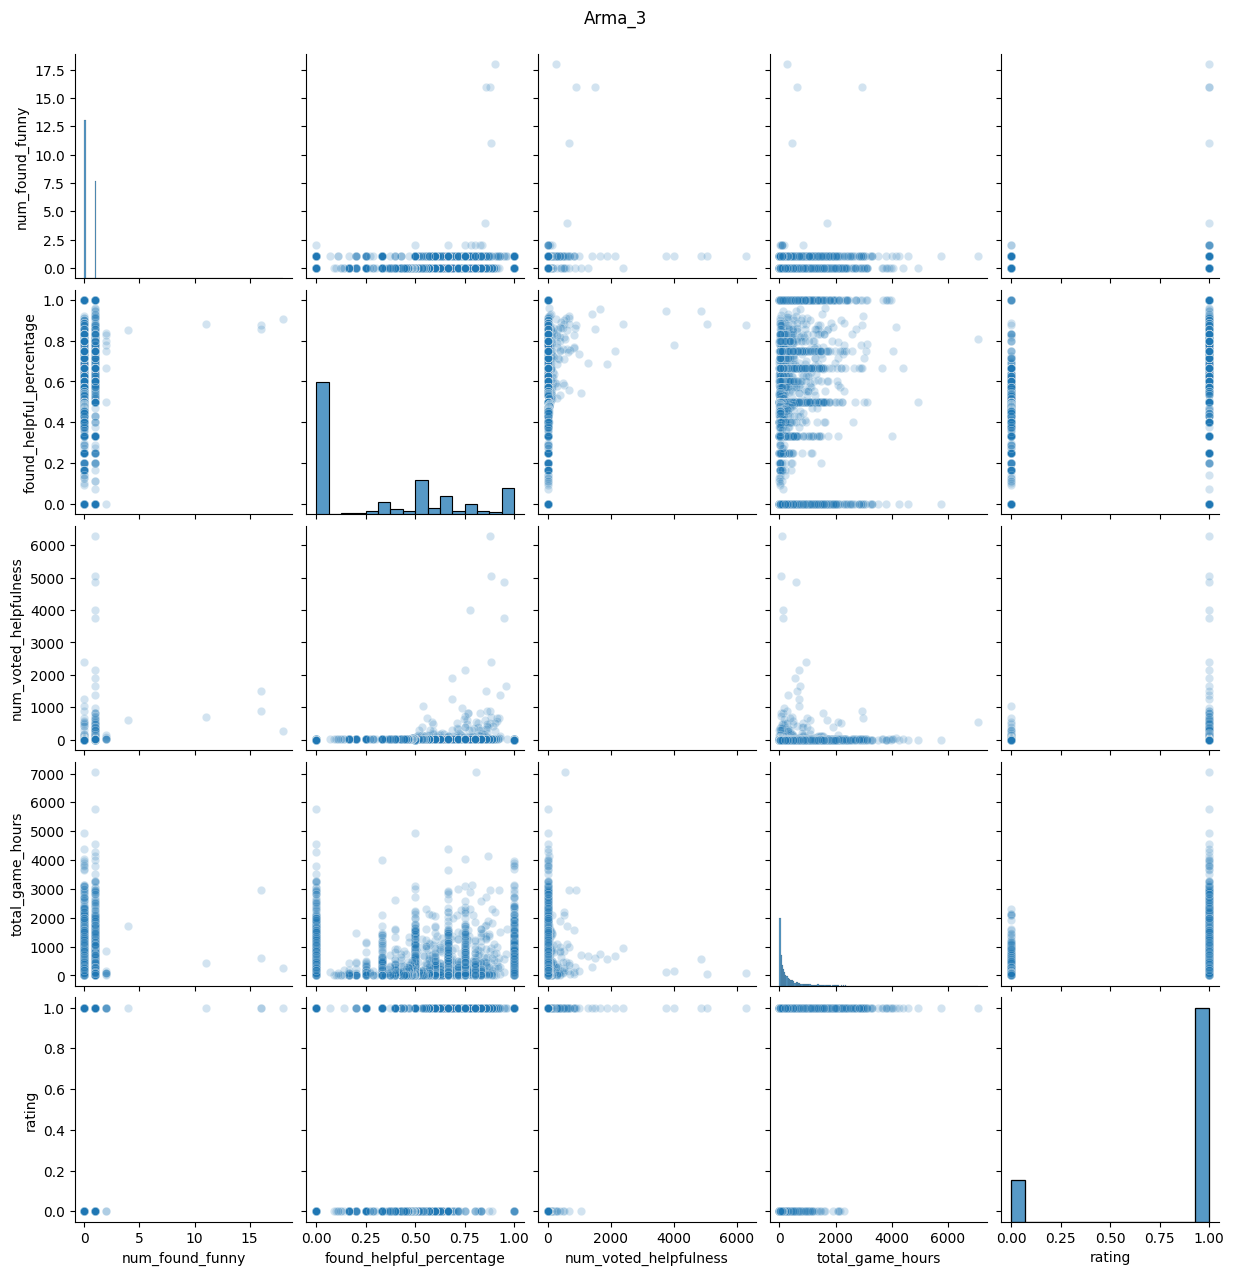

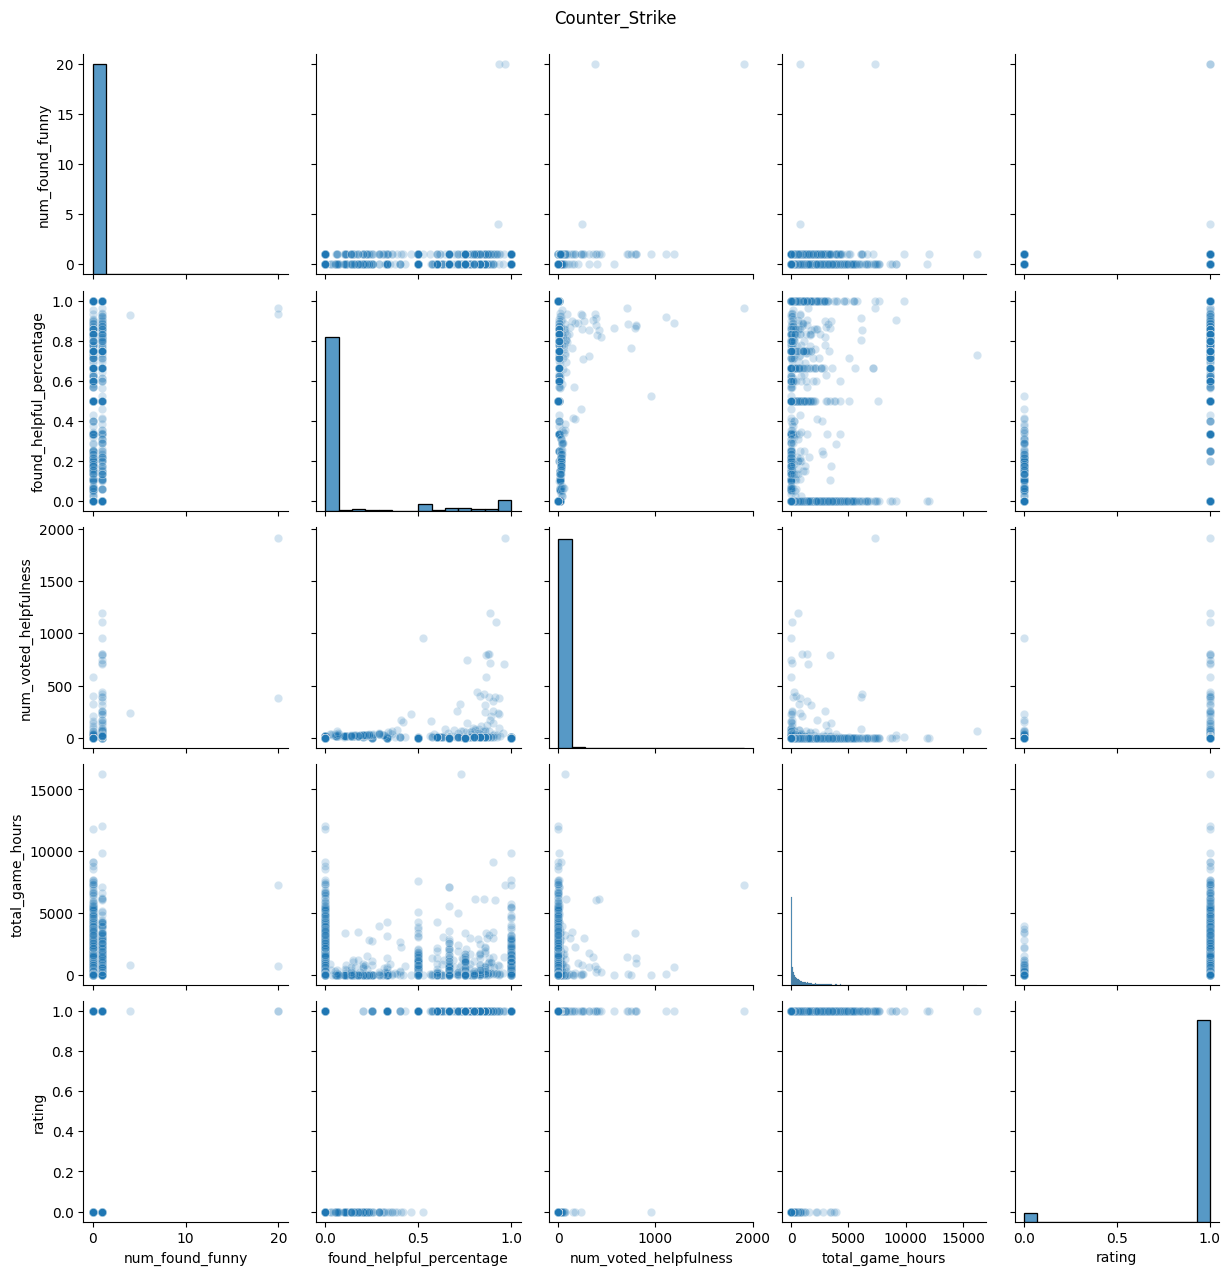

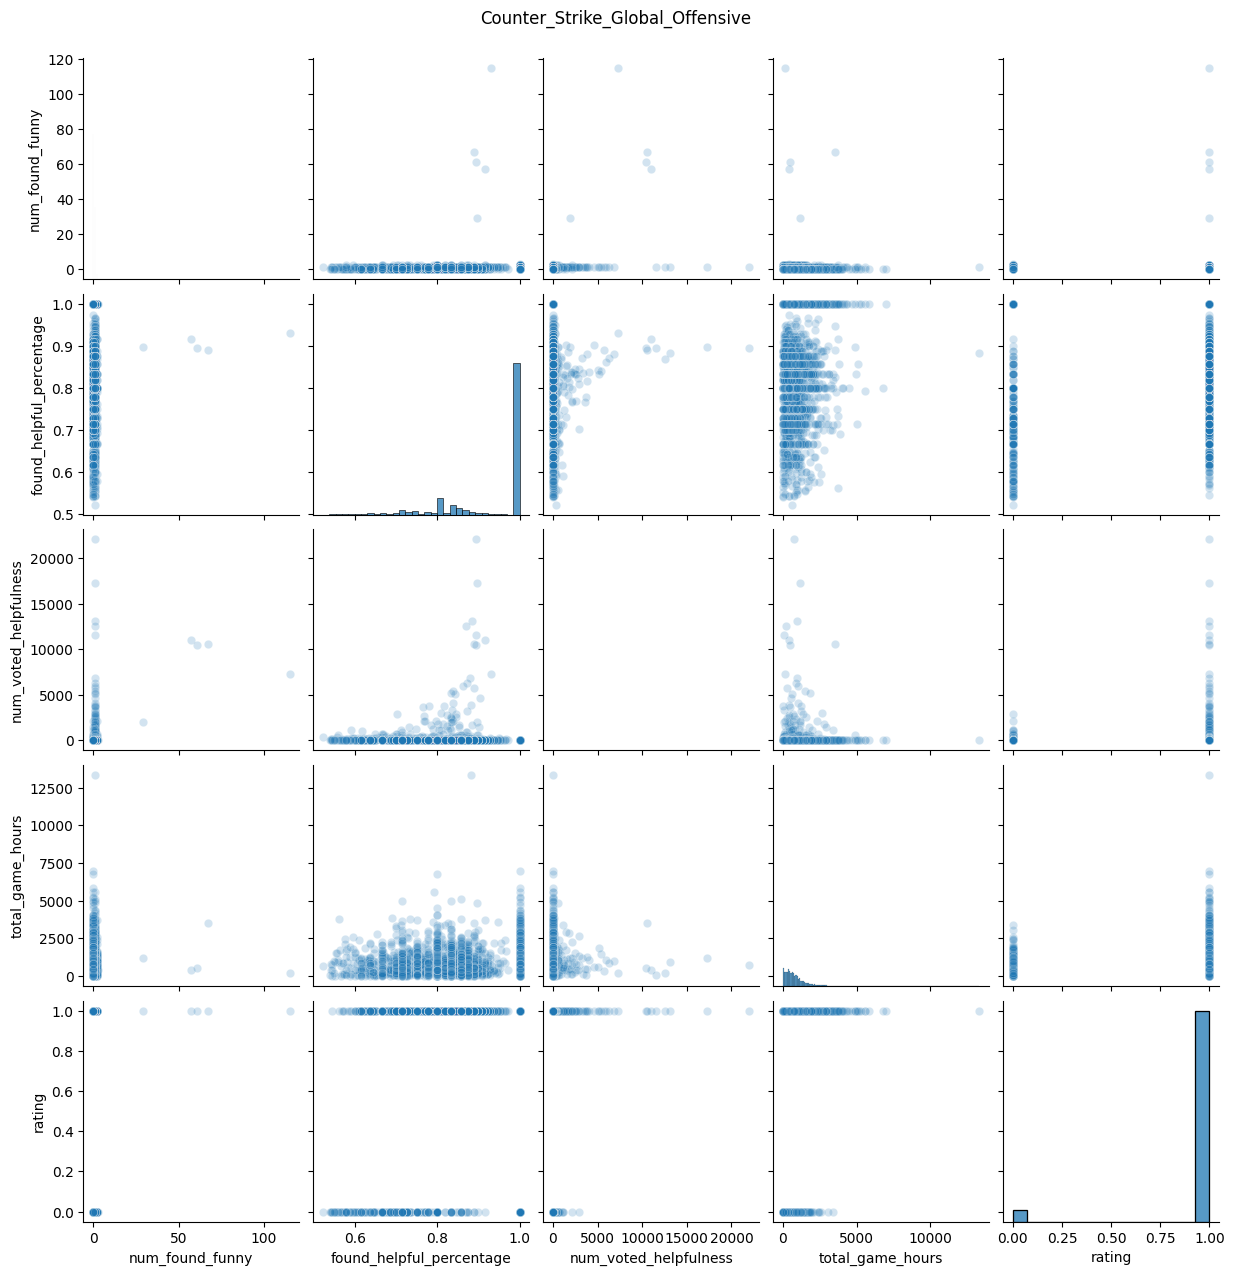

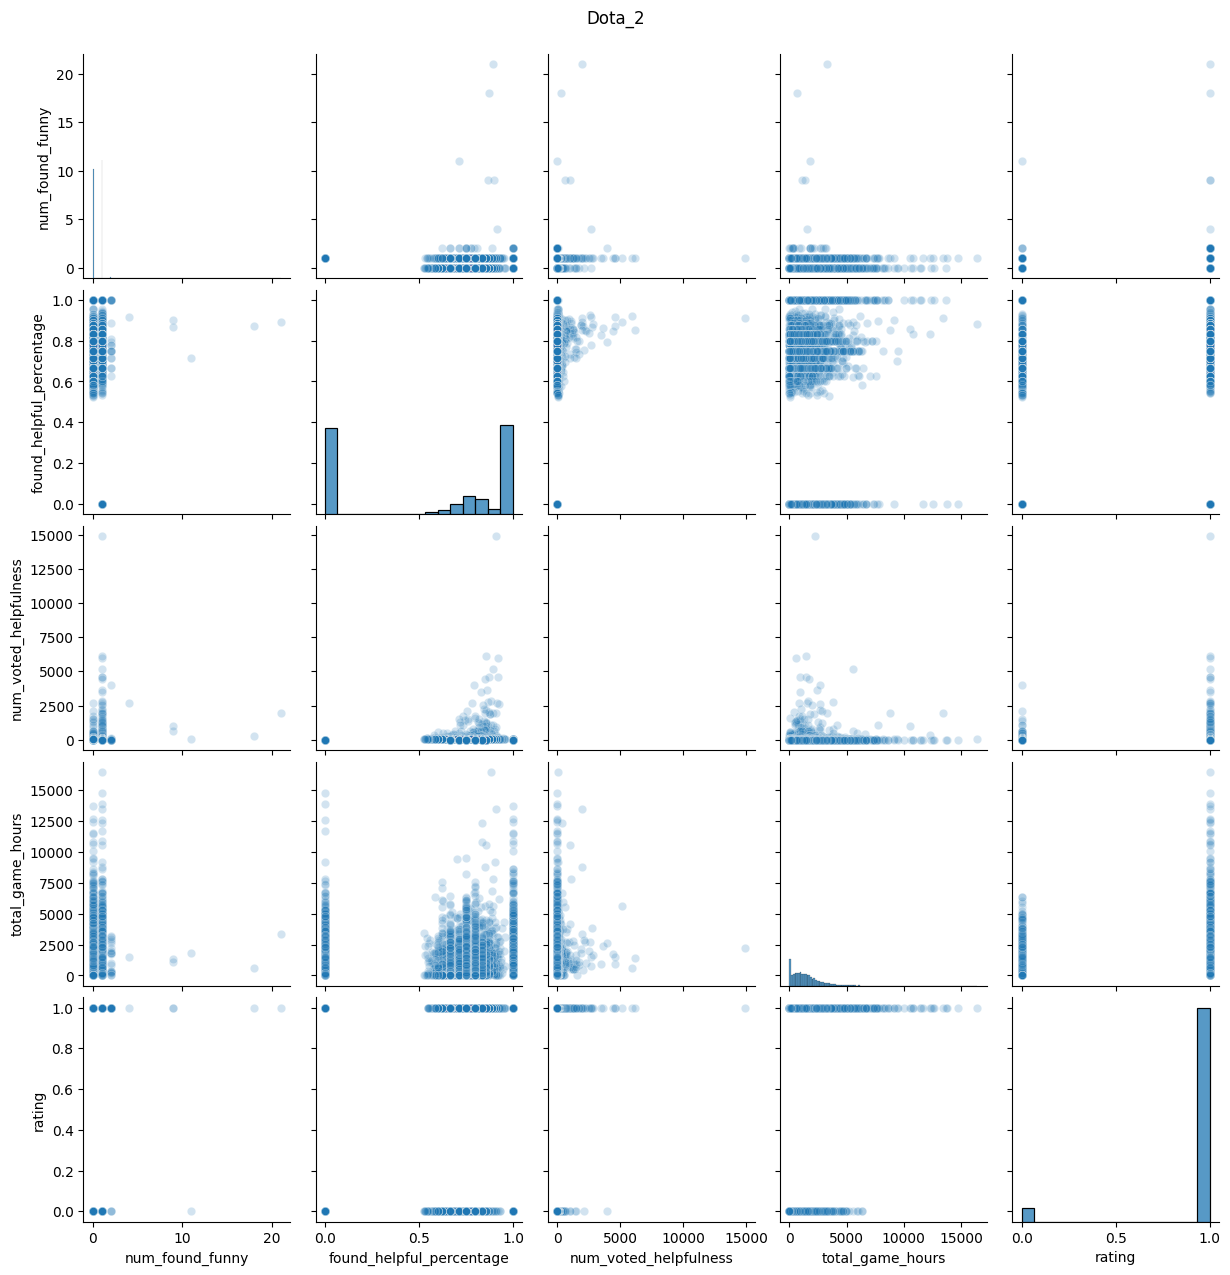

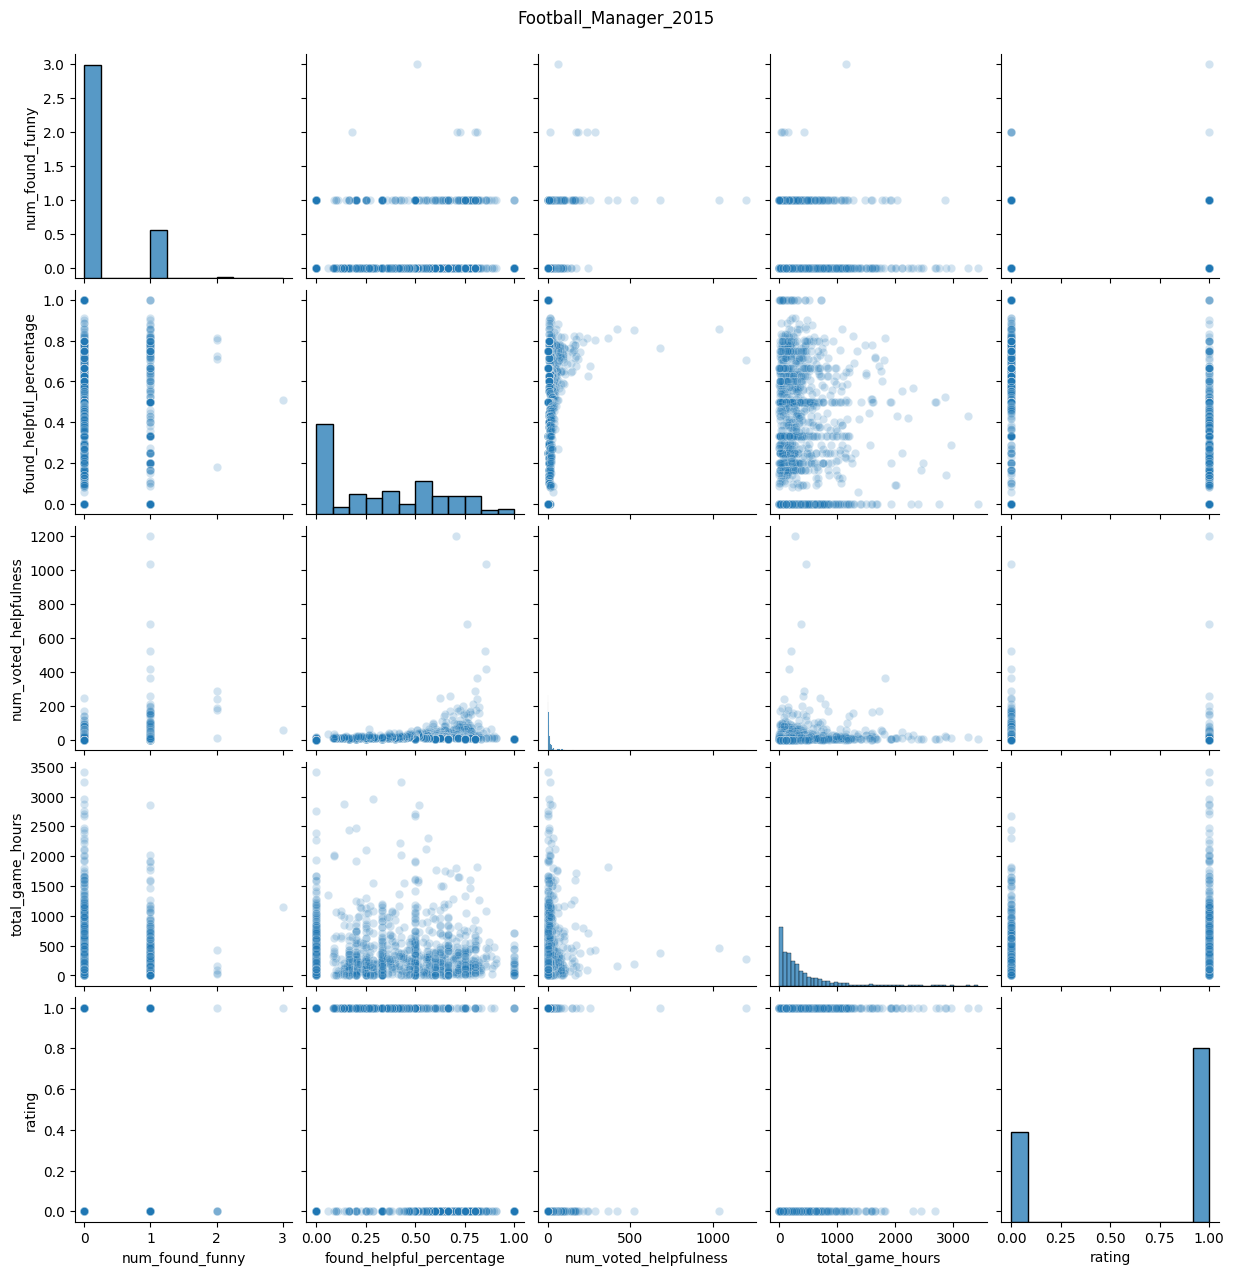

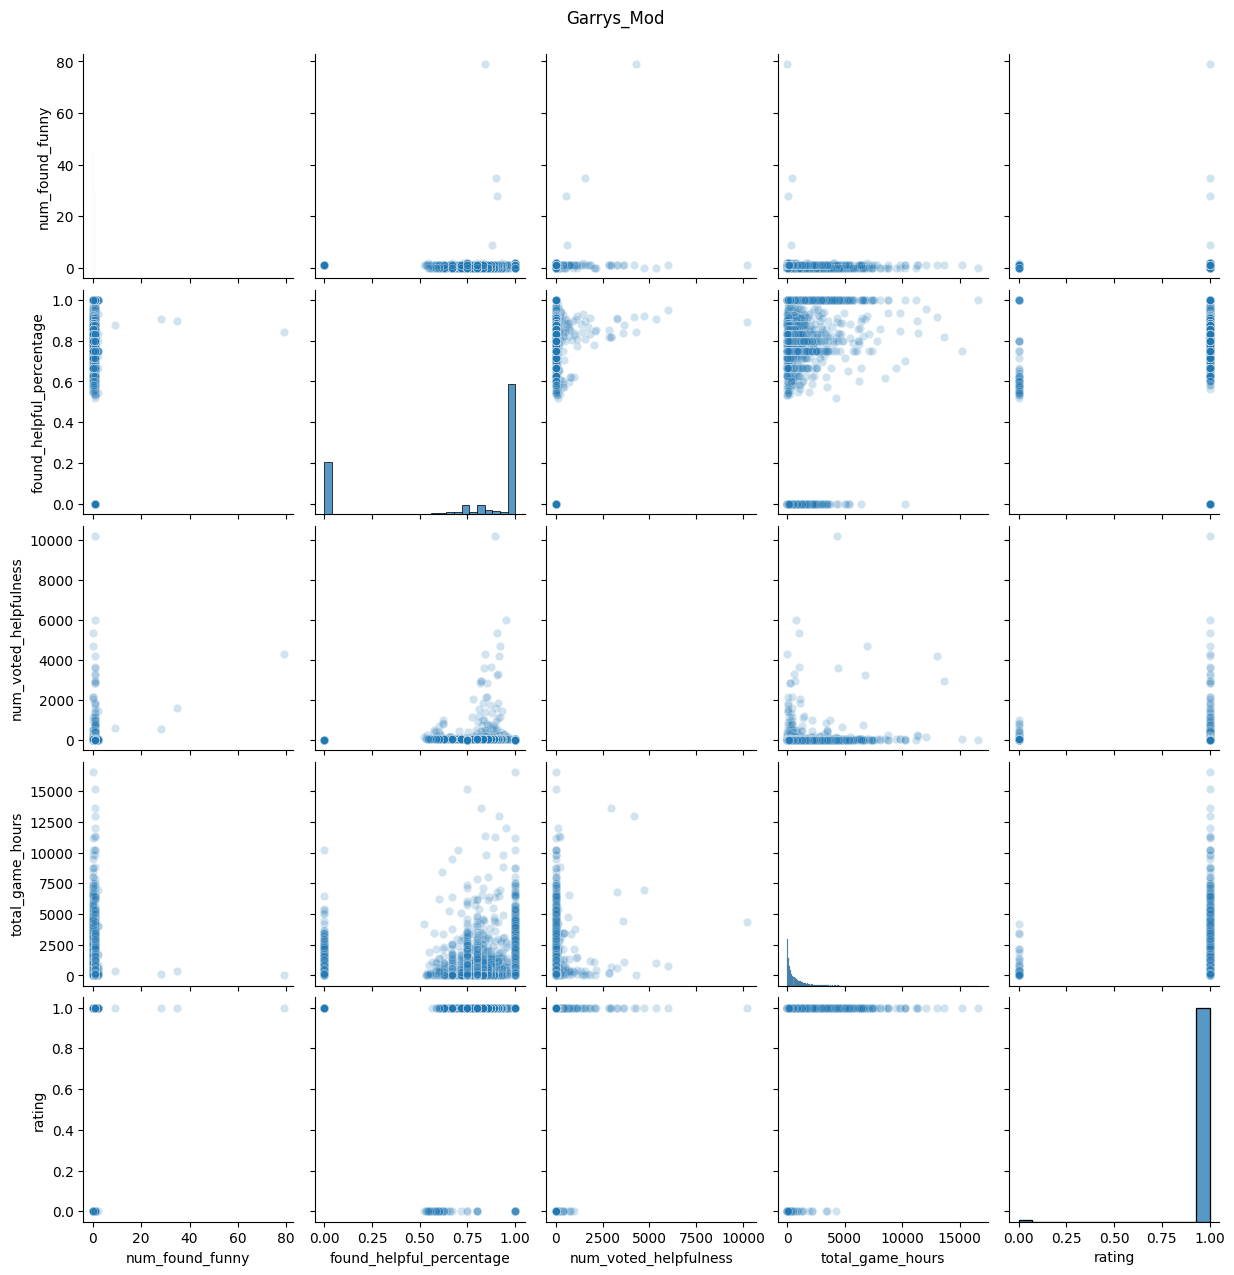

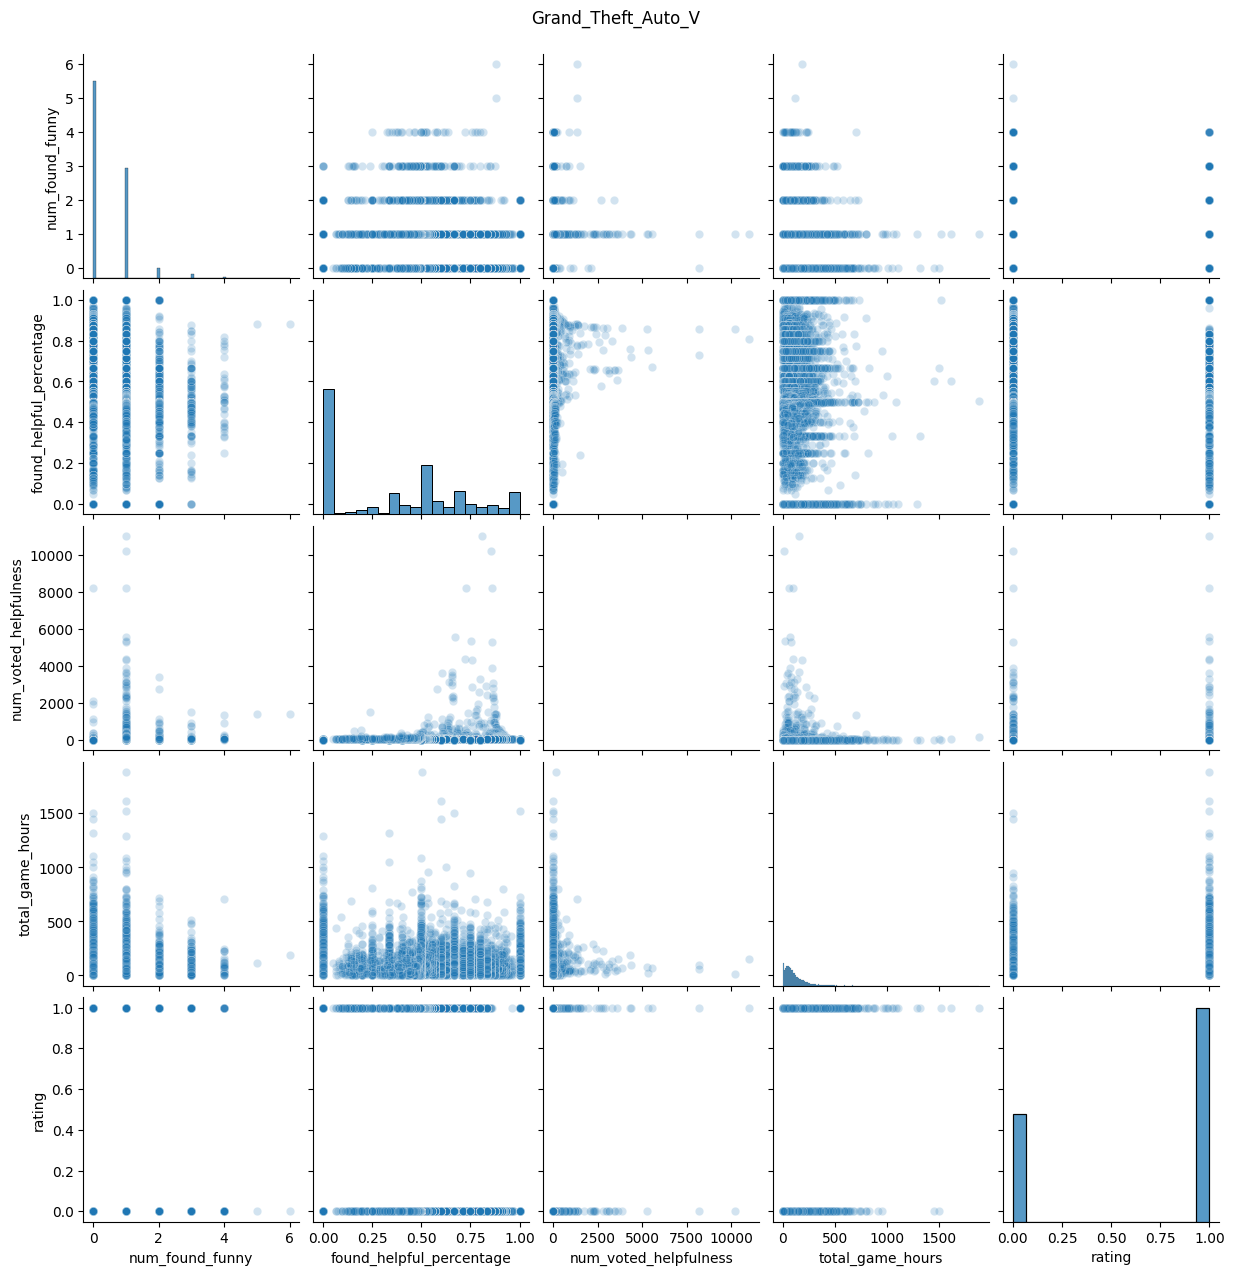

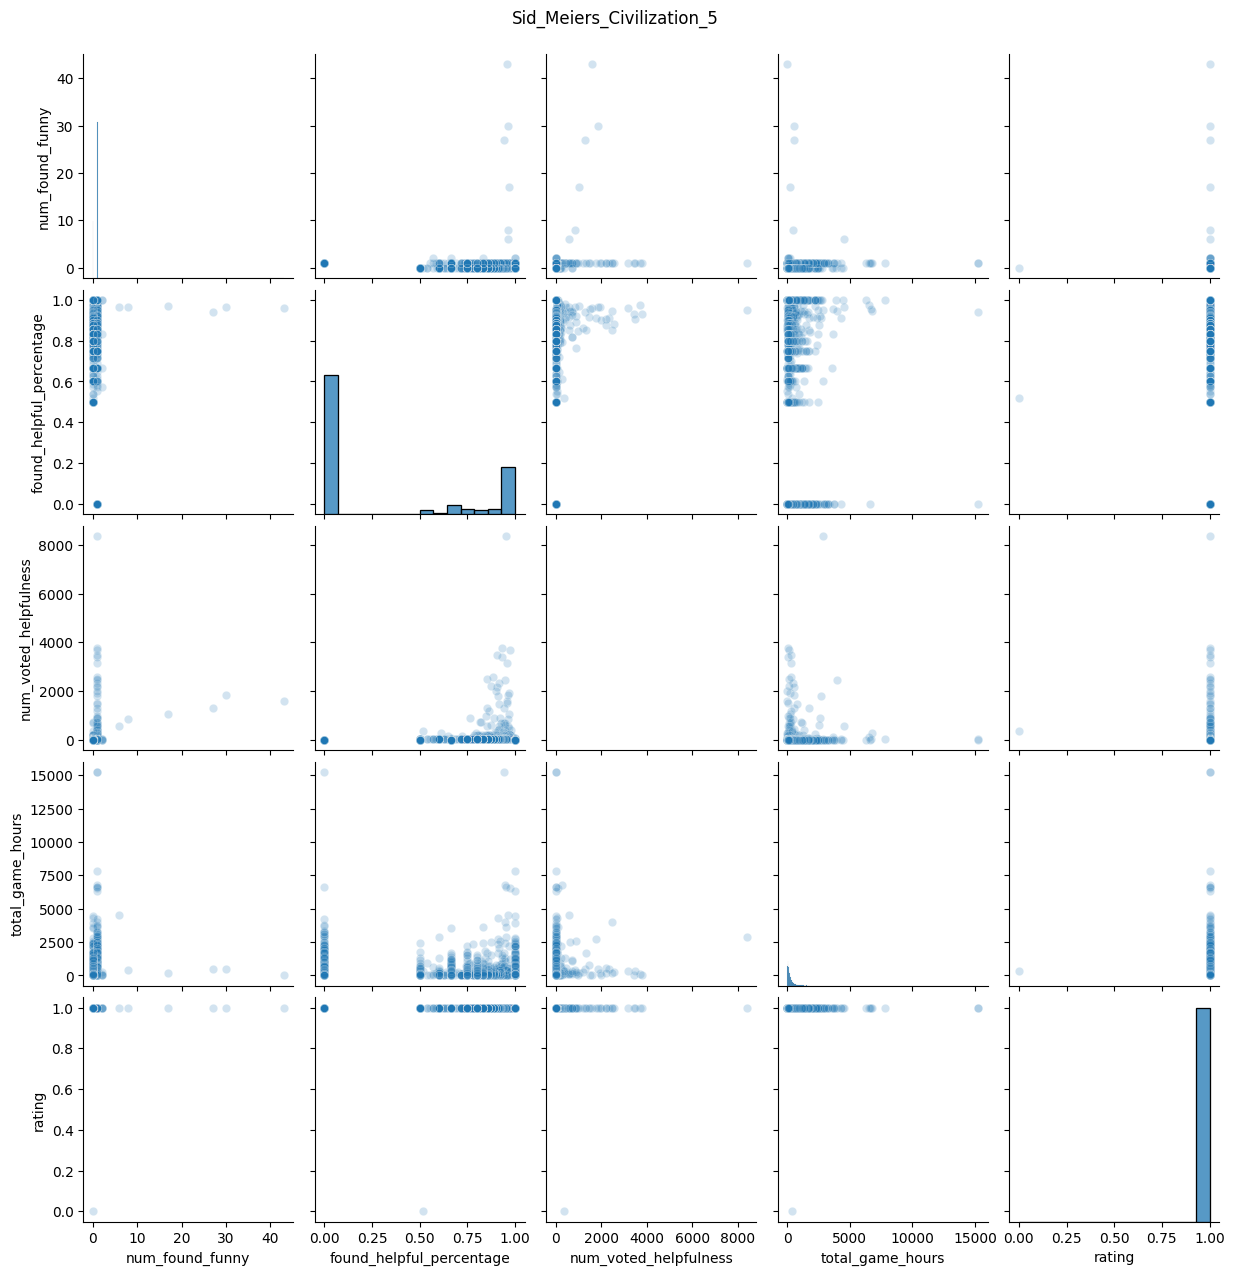

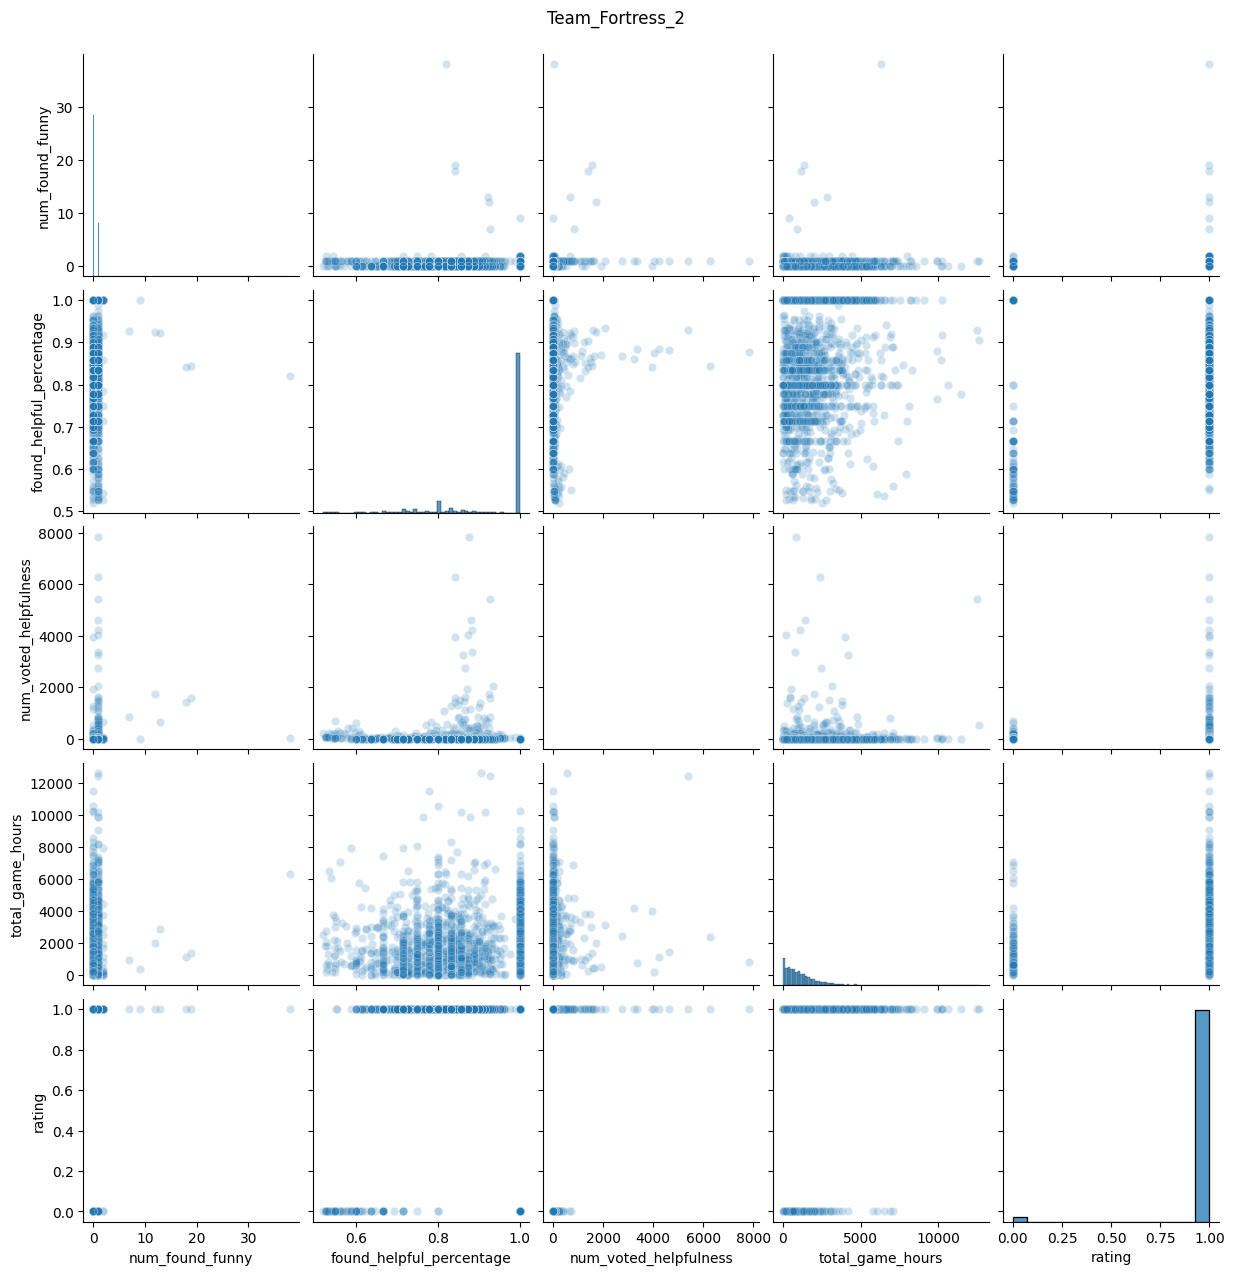

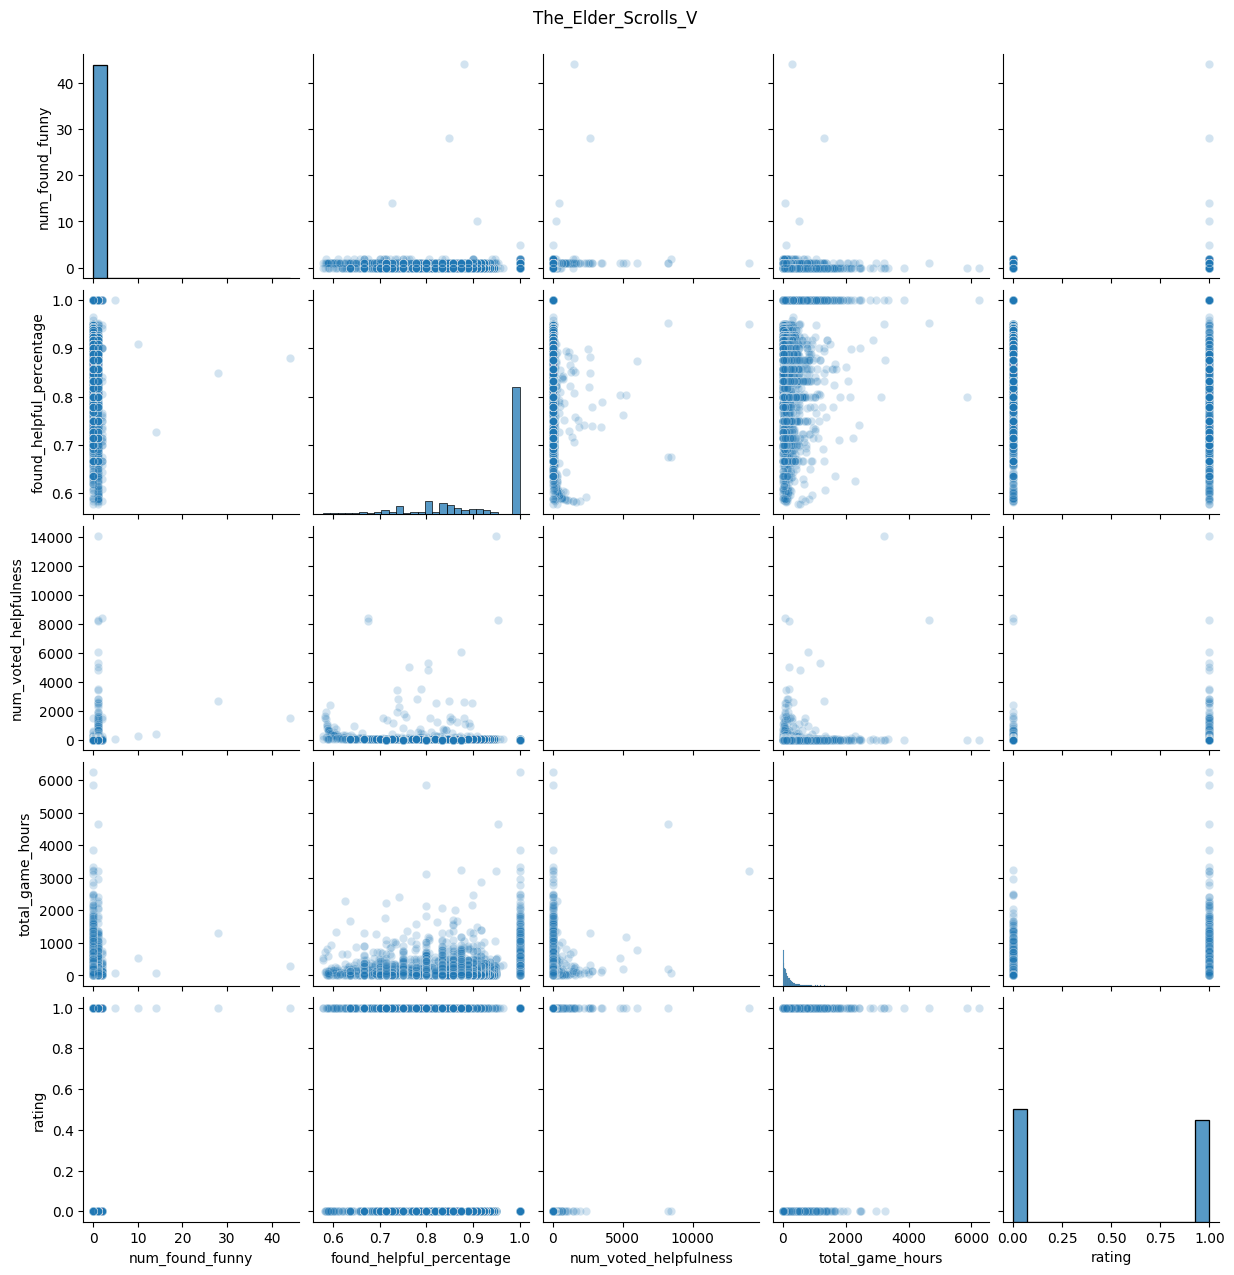

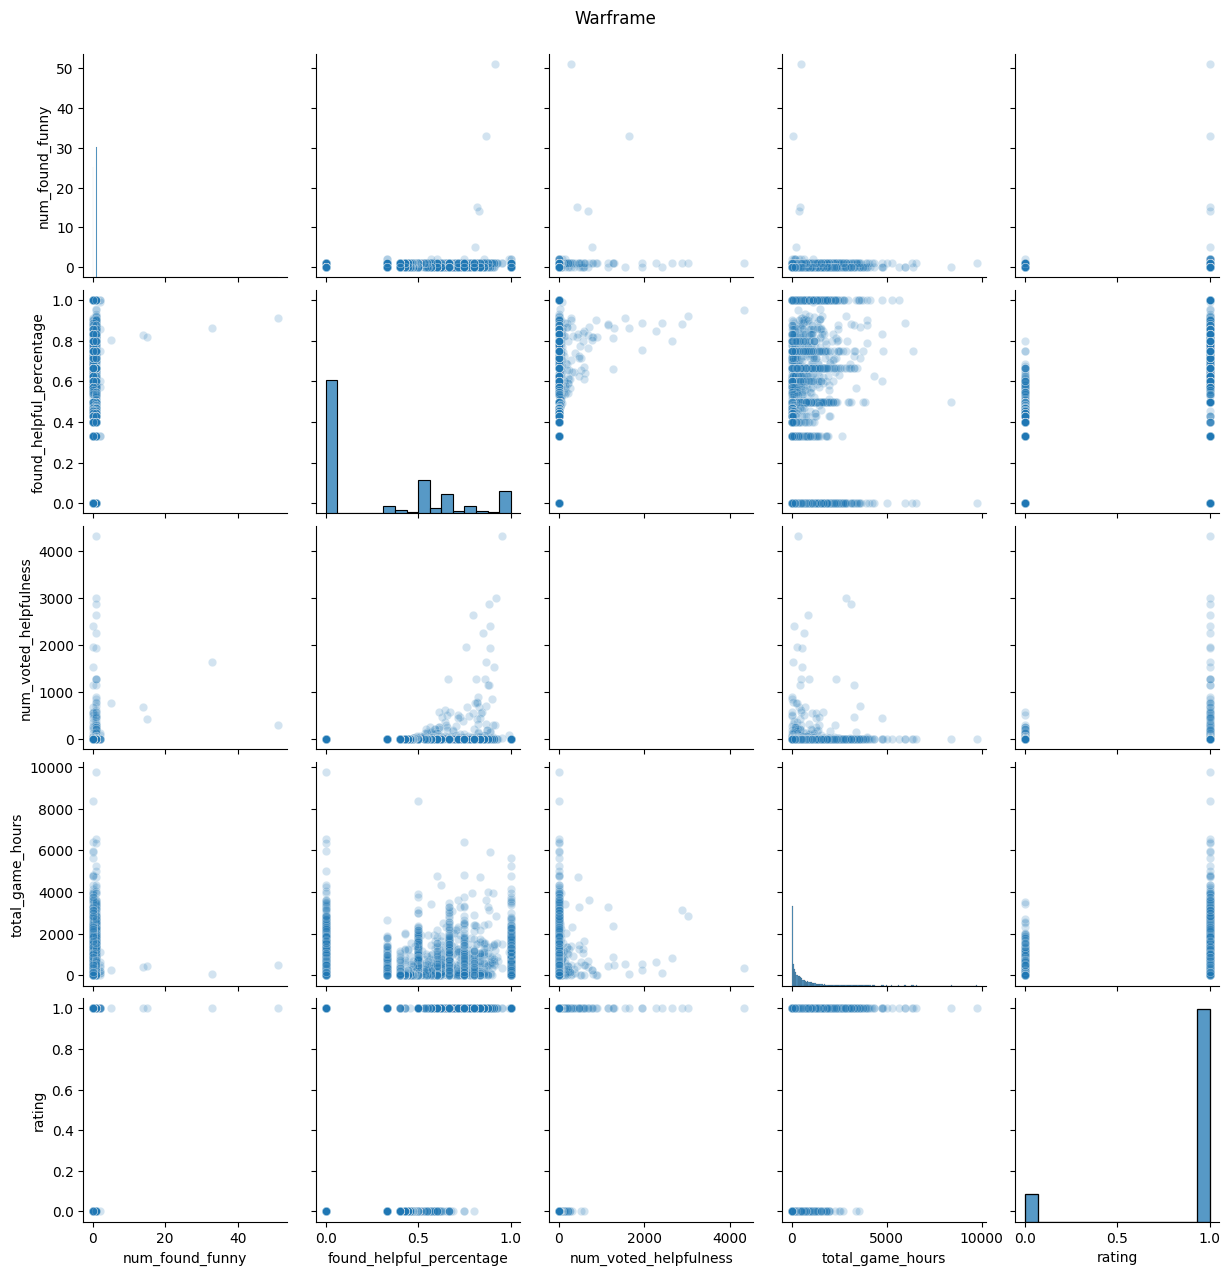

In [3]:
for game in dfs.keys():
    ax = sns.pairplot(dfs[game], diag_kind="hist", plot_kws=dict(alpha=0.2))
    ax.fig.suptitle(game, y=1.02)#.set(title=game)
    plt.savefig(f"{game}_pairplot.png")
    

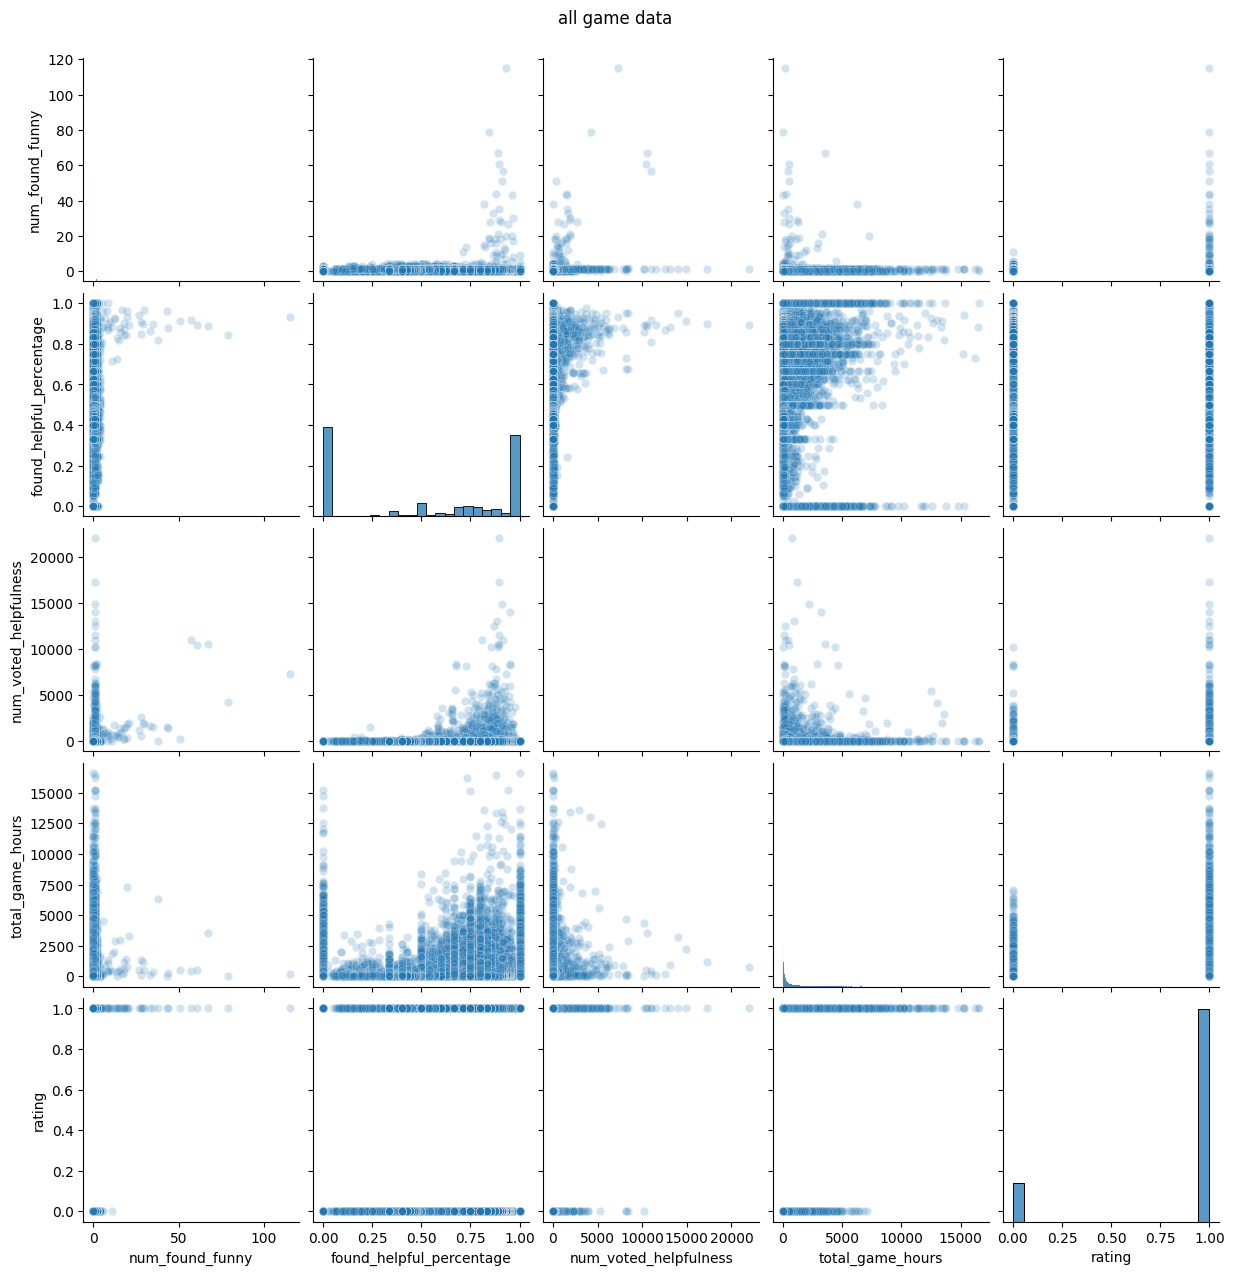

In [4]:
ax = sns.pairplot(combined_df, diag_kind="hist", plot_kws=dict(alpha=0.2))
ax.fig.suptitle("all game data", y=1.02)
plt.savefig(f"all_games_pairplot.png")

In [5]:
arma_3 = []
with open(f'{datapath}/Arma_3.jsonlines') as f:
    for line in f:
        arma_3.append(json.loads(line))
        
f.close()

for key in arma_3[102].keys():
    dat = arma_3[102][key]
    print(f'{key}: {dat}')
    print(type(dat))
    print('\n')

total_game_hours_last_two_weeks: 0.0
<class 'float'>


num_groups: 6
<class 'int'>


orig_url: http://steamcommunity.com/app/107410/homecontent/?userreviewsoffset=100&p=1&itemspage=11&screenshotspage=11&videospage=11&artpage=11&allguidepage=11&webguidepage=11&integratedguidepage=11&discussionspage=11&appid=107410&appHubSubSection=10&appHubSubSection=10&l=english&browsefilter=toprated&filterLanguage=default&searchText=&forceanon=1
<class 'str'>


num_badges: 6
<class 'int'>


review_url: http://steamcommunity.com/id/shotbygun/recommended/107410/
<class 'str'>


num_found_funny: 1
<class 'int'>


review: Pros: - Most wide maps of any shooting game that I have played. - Mods really make arma - Modding community is really good - Powerful map editor and scripting language Cons: - Really badly implemented multi-threading resulting in horrible performance - Inconsistent and buggy scripting language with many flaws. - Netcode is still not very stable - Game and mods require approximately 100GB